First try with linear regression and tuning with Optuna. Looking for ways to measure the results. Nothing really useful in this notebook.

First try with linear regression and tuning with Optuna. Searchin for good ways to measure the results. Nothing really useful in this notebook. 

In [ ]:
import os
os.chdir(r"c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination")
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from unidecode import unidecode

In [21]:
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("data/cleaned_data/bulletins_w_labels_and_content.csv", dtype={'ID': object})  
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,Label 60/40,Numeric label 60/40,Label 70/30,Numeric label 70/30,Cleaned text,Text
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206 041814.txt,M,2,N,0,director class code open date annual salary du...,311 DIRECTOR Class Code: 9206 Open Date:...
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223 071318.txt,W,1,W,1,accounting clerk class code open date exam ope...,ACCOUNTING CLERK Class Code: 1223 Open ...
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260 120216.txt,M,2,M,2,airport manager class code open date exam open...,AIRPORT MANAGER Class Code: 7260 Open D...
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227 091616.txt,M,2,M,2,airport police lieutenant class code open date...,AIRPORT POLICE LIEUTENANT ...
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400 050214.txt,M,2,N,0,aquarist class code open date annual salary ca...,AQUARIST Class Code: 2400 Open Date: 05...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840 1...,M,2,N,0,wastewater treatment laboratory manager class ...,WASTEWATER TREATMENT LABORATORY MANAGER Class...
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 120718.txt,M,2,M,2,wastewater treatment operator class code open ...,WASTEWATER TREATMENT OPERATOR Class Code: ...
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857 072514 rev073114.txt,N,0,N,0,water microbiologist class code open date revi...,WATER MICROBIOLOGIST Class Code: 7857...
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912 120817.txt,M,2,M,2,water utility worker class code open date exam...,WATER UTILITY WORKER Class Code: 3912 Op...


In [4]:
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,Label 60/40,Numeric label 60/40,Label 70/30,Numeric label 70/30,Cleaned text,Text
0,1770,SENIOR CLAIMS REPRESENTATIVE,175,89,84,2,SENIOR CLAIMS REPRESENTATIVE 1770 070717 (1).txt,N,0,N,0,senior claim representative class code open da...,SENIOR CLAIMS REPRESENTATIVE Class Code: ...
1,3819,SIGNAL SYSTEMS ELECTRICIAN,223,1,222,0,SIGNAL SYSTEMS ELECTRICIAN 3819 042018.txt,M,2,M,2,signal system electrician class code open date...,SIGNAL SYSTEMS ELECTRICIAN\t\t Class Code: ...
2,3595,AUTOMOTIVE DISPATCHER,104,27,75,2,AUTOMOTIVE DISPATCHER 3595 102017 revised.txt,M,2,M,2,automotive dispatcher class code open date exa...,AUTOMOTIVE DISPATCHER Class Code: 3595 Op...
3,3987,WATERWORKS MECHANIC SUPERVISOR,30,1,29,0,WATERWORKS MECHANIC SUPERVISOR 3987 051614 (1)...,M,2,M,2,waterworks mechanic supervisor class code open...,WATERWORKS MECHANIC SUPERVISOR ...
4,1839,PRINCIPAL STOREKEEPER,56,13,43,0,PRINCIPAL STOREKEEPER 1839 072718.txt,M,2,M,2,principal storekeeper class code open date exa...,PRINCIPAL STOREKEEPER Class Code: 1839...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2472,SUPERINTENDENT OF RECREATION AND PARKS OPERATIONS,26,8,18,0,SUPERINTENDENT OF RECREATION AND PARKS OPERATI...,M,2,N,0,superintendent recreation park operation class...,SUPERINTENDENT OF RECREATION AND PARKS OPERATI...
173,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857 072514 rev073114.txt,N,0,N,0,water microbiologist class code open date revi...,WATER MICROBIOLOGIST Class Code: 7857...
174,2454,ARTS ASSOCIATE,702,430,240,32,ARTS ASSOCIATE 2454 072117 REV 072817.txt,W,1,N,0,art associate class code open date revise exam...,ARTS ASSOCIATE Class Code: 2454 ...
175,3801,SENIOR COMMUNICATIONS CABLE WORKER,28,0,27,1,SENIOR COMMUNICATIONS CABLE WORKER 3801 102116...,M,2,M,2,senior communication cable worker class code o...,SENIOR COMMUNICATIONS CABLE WORKER Class Code...


In [6]:
X = df["Cleaned text"]
y = df["Numeric label 70/30"]

In [7]:
vectorizer = CountVectorizer()

In [8]:
X = vectorizer.fit_transform(X).toarray()

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1001)

In [384]:
log_reg = LogisticRegression()

In [385]:
log_reg.fit(X_train, y_train)

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [386]:
predictions = log_reg.predict(X_test)

In [387]:
predictions

array([2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2], dtype=int64)

In [388]:
list(zip(y_test, list(predictions)))

[(2, 2),
 (2, 2),
 (2, 2),
 (1, 2),
 (0, 0),
 (0, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 0),
 (0, 0),
 (2, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (1, 2),
 (0, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 0),
 (0, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (2, 2),
 (2, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2)]

In [389]:
score = log_reg.score(X_test, y_test)
score

0.7333333333333333

In [390]:
scores = cross_val_score(log_reg, X, y, cv=10)

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

In [391]:
scores

array([0.72222222, 0.83333333, 0.88888889, 0.83333333, 0.83333333,
       0.88888889, 0.83333333, 0.82352941, 0.76470588, 0.88235294])

In [392]:
scores.mean()

0.830392156862745

In [393]:
X_train_test, X_gtest, y_train_test, y_gtest = train_test_split(X, y, test_size=0.10)

In [394]:
cv_results = cross_validate(log_reg, X_train_test, y_train_test, cv=5, return_estimator=True)

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

In [395]:
cv_results["test_score"]

array([0.875     , 0.78125   , 0.78125   , 0.875     , 0.77419355])

In [396]:
cv_results["test_score"].mean()

0.8173387096774194

In [397]:
gtest_score = []
for i in range(len(cv_results['estimator'])):
  gtest_score.append(cv_results['estimator'][i].score(X_gtest, y_gtest))

In [398]:
sum(gtest_score) / len(gtest_score)

0.8222222222222223

In [425]:
def objective(trial):    
    # Step 2. Setup values for the hyperparameters:
    logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
    classifier_obj = LogisticRegression(C=logreg_c)

    classifier_obj.fit(X_train, y_train)
    preds = classifier_obj.predict(X_test)
    
    # Step 3: Scoring method:
    score = cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    p_r_f_s = precision_recall_fscore_support(y_test, preds)
    precision = p_r_f_s[0][0]
    print(precision)
    recall = p_r_f_s[0][1]
    f1 = p_r_f_s[0][2]
    #support = p_r_f_s[3]
    
    return accuracy, precision, recall, f1

In [426]:
# Step 4: Running it
study = optuna.create_study(directions=["maximize", "maximize", "maximize", "maximize"])
study.optimize(objective, n_trials=100)

[I 2022-12-20 16:54:31,425] A new study created in memory with name: no-name-191ad48d-f9de-4cf9-abfe-2eeef78ead27
c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:34,807] Trial 0 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 40.40055447162931}. 


0.5384615384615384


[I 2022-12-20 16:54:36,047] Trial 1 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 1497875.789770839}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:54:37,352] Trial 2 finished with values: [0.7288135593220338, 0.8333333333333334, 0.0, 0.7692307692307693] and parameters: {'logreg_c': 0.00017347009095646909}. 


0.8333333333333334


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:39,250] Trial 3 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 44.16849644775723}. 


0.5384615384615384


[I 2022-12-20 16:54:40,839] Trial 4 finished with values: [0.8531073446327683, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 3120.1234661796025}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:42,376] Trial 5 finished with values: [0.8305084745762712, 0.6363636363636364, 0.0, 0.8484848484848485] and parameters: {'logreg_c': 0.0039002995527574968}. 


0.6363636363636364


[I 2022-12-20 16:54:42,811] Trial 6 finished with values: [0.8531073446327683, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 4474.286228409772}. 


0.5384615384615384


[I 2022-12-20 16:54:43,152] Trial 7 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 63776917.63856781}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:54:43,634] Trial 8 finished with values: [0.7401129943502825, 0.8333333333333334, 0.0, 0.7692307692307693] and parameters: {'logreg_c': 0.00026116404381777795}. 


0.8333333333333334


[I 2022-12-20 16:54:43,973] Trial 9 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 145471139.34151244}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:54:44,412] Trial 10 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.41088368391129e-09}. 


0.0


[I 2022-12-20 16:54:44,910] Trial 11 finished with values: [0.8418079096045198, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2081.2505269157687}. 


0.5384615384615384


[I 2022-12-20 16:54:45,250] Trial 12 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2474324.1005232004}. 


0.5384615384615384


[I 2022-12-20 16:54:45,577] Trial 13 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 876592423.6803751}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:54:46,030] Trial 14 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 8.214403960159615e-09}. 


0.0


[I 2022-12-20 16:54:46,667] Trial 15 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 221.43274530918788}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:54:47,022] Trial 16 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.326467576172658e-06}. 


0.0


[I 2022-12-20 16:54:47,627] Trial 17 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 9308341172.937336}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:48,428] Trial 18 finished with values: [0.8418079096045198, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 1.0413476778025816}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:49,293] Trial 19 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 58.90009904919971}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:50,166] Trial 20 finished with values: [0.8418079096045198, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 0.8972182859381165}. 


0.5384615384615384


[I 2022-12-20 16:54:50,507] Trial 21 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 8790237.747557133}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:51,512] Trial 22 finished with values: [0.8418079096045198, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 0.2710097161168381}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:54:51,931] Trial 23 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 8.648385484475096e-08}. 


0.0


[I 2022-12-20 16:54:52,259] Trial 24 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 24328728.19683115}. 


0.5384615384615384


[I 2022-12-20 16:54:52,617] Trial 25 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 25325.04962340838}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:54:53,009] Trial 26 finished with values: [0.6779661016949152, 0.75, 0.0, 0.7317073170731707] and parameters: {'logreg_c': 7.632648731048564e-05}. 


0.75


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:53,804] Trial 27 finished with values: [0.8418079096045198, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2.1730289814890797}. 


0.5384615384615384


[I 2022-12-20 16:54:54,224] Trial 28 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 167156559.86465746}. 


0.5384615384615384


[I 2022-12-20 16:54:54,672] Trial 29 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 5515575631.778255}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:55,526] Trial 30 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 25.5874935479746}. 


0.5384615384615384


[I 2022-12-20 16:54:55,884] Trial 31 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 76063216.59020081}. 


0.5384615384615384


[I 2022-12-20 16:54:56,243] Trial 32 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 1462288579.6601548}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:54:57,022] Trial 33 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 5.9190644358259945}. 


0.5384615384615384


[I 2022-12-20 16:54:57,364] Trial 34 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 4323840524.135543}. 


0.5384615384615384


[I 2022-12-20 16:54:57,705] Trial 35 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 69043.02481576797}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:54:57,969] Trial 36 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.7833018667527524e-10}. 


0.0


[I 2022-12-20 16:54:58,297] Trial 37 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 821995.2597395538}. 


0.5384615384615384


[I 2022-12-20 16:54:58,751] Trial 38 finished with values: [0.8531073446327683, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 6149.9766206077575}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:54:59,251] Trial 39 finished with values: [0.7457627118644067, 0.8333333333333334, 0.0, 0.7692307692307693] and parameters: {'logreg_c': 0.00029075434165292714}. 


0.8333333333333334


[I 2022-12-20 16:54:59,577] Trial 40 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 137231925.9367498}. 


0.5384615384615384


[I 2022-12-20 16:54:59,918] Trial 41 finished with values: [0.8531073446327683, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 46130.98180642906}. 


0.5384615384615384


[I 2022-12-20 16:55:00,247] Trial 42 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 5180520033.35532}. 


0.5384615384615384


[I 2022-12-20 16:55:00,729] Trial 43 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2116.382186115042}. 


0.5384615384615384


[I 2022-12-20 16:55:01,056] Trial 44 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 108474.82808838805}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:01,835] Trial 45 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 5.18218987948677}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:02,116] Trial 46 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.5706373524587092e-10}. 


0.0


[I 2022-12-20 16:55:02,755] Trial 47 finished with values: [0.8418079096045198, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 313.23956730548736}. 


0.5384615384615384


[I 2022-12-20 16:55:03,111] Trial 48 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2851681.877022187}. 


0.5384615384615384


[I 2022-12-20 16:55:03,798] Trial 49 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 151.29767309891403}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:04,654] Trial 50 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 8.621467510649879}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:05,137] Trial 51 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 2.0895836295588517e-09}. 


0.0


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:05,508] Trial 52 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 2.0136538977871903e-06}. 


0.0


[I 2022-12-20 16:55:05,895] Trial 53 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 4133391378.8235}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:06,178] Trial 54 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 2.7794939718548573e-10}. 


0.0


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:06,537] Trial 55 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.1055814050411254e-05}. 


0.0


[I 2022-12-20 16:55:07,127] Trial 56 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 156731.14992317668}. 


0.5384615384615384


[I 2022-12-20 16:55:07,455] Trial 57 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 70267851.60656622}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:08,249] Trial 58 finished with values: [0.8418079096045198, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 0.5212020133162119}. 


0.5384615384615384


[I 2022-12-20 16:55:08,919] Trial 59 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 157.0997323313373}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:09,183] Trial 60 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.911058364274404e-10}. 


0.0


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:09,975] Trial 61 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 47.35737029714375}. 


0.5384615384615384


[I 2022-12-20 16:55:10,522] Trial 62 finished with values: [0.8418079096045198, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 958.150044515443}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:11,311] Trial 63 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 0.16182334026444295}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:11,746] Trial 64 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 7.922367081773541e-09}. 


0.0


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:12,523] Trial 65 finished with values: [0.8418079096045198, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 0.5178593750557182}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:13,327] Trial 66 finished with values: [0.8418079096045198, 0.5833333333333334, 0.0, 0.8387096774193549] and parameters: {'logreg_c': 0.016740946634370944}. 


0.5833333333333334


[I 2022-12-20 16:55:13,796] Trial 67 finished with values: [0.8531073446327683, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 4502.537578633287}. 


0.5384615384615384


[I 2022-12-20 16:55:14,139] Trial 68 finished with values: [0.8531073446327683, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 56312.70030350103}. 


0.5384615384615384


[I 2022-12-20 16:55:14,482] Trial 69 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 154185.8455610962}. 


0.5384615384615384


[I 2022-12-20 16:55:14,948] Trial 70 finished with values: [0.8531073446327683, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 7583.753647155869}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:15,411] Trial 71 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.5182120090608364e-08}. 


0.0


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:15,878] Trial 72 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 9.487947876530682e-10}. 


0.0


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:16,718] Trial 73 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 0.1843286032655299}. 


0.5384615384615384


[I 2022-12-20 16:55:17,138] Trial 74 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 18445.218902420882}. 


0.5384615384615384


[I 2022-12-20 16:55:17,526] Trial 75 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 217217841.91781038}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:17,944] Trial 76 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 2.4588704497540336e-10}. 


0.0


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:18,407] Trial 77 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.7722573498511458e-05}. 


0.0


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:19,292] Trial 78 finished with values: [0.8418079096045198, 0.5833333333333334, 0.0, 0.84375] and parameters: {'logreg_c': 0.011294278439596834}. 


0.5833333333333334


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:19,771] Trial 79 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.7002798900059656e-09}. 


0.0


[I 2022-12-20 16:55:20,146] Trial 80 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2385447081.776751}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:20,927] Trial 81 finished with valu

0.7


[I 2022-12-20 16:55:21,270] Trial 82 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2617340.5738402}. 


0.5384615384615384


[I 2022-12-20 16:55:21,616] Trial 83 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 74481398.13733858}. 


0.5384615384615384


[I 2022-12-20 16:55:21,961] Trial 84 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 1280309.5918072662}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:22,461] Trial 85 finished with values: [0.7514124293785311, 0.8333333333333334, 0.0, 0.7692307692307693] and parameters: {'logreg_c': 0.00029414416546105315}. 


0.8333333333333334


[I 2022-12-20 16:55:22,942] Trial 86 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2532.324209747791}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:23,240] Trial 87 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 4.0395120117571813e-10}. 


0.0


[I 2022-12-20 16:55:23,568] Trial 88 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2359544.4799811128}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:24,352] Trial 89 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 0.2736134495412584}. 


0.5384615384615384


[I 2022-12-20 16:55:24,692] Trial 90 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 5812943.722095417}. 


0.5384615384615384


[I 2022-12-20 16:55:25,268] Trial 91 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 299284623.4510366}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:26,031] Trial 92 finished with values: [0.8305084745762712, 0.5833333333333334, 0.0, 0.84375] and parameters: {'logreg_c': 0.003914219645257656}. 


0.5833333333333334


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:26,855] Trial 93 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 1.2942781977142455}. 


0.5384615384615384


[I 2022-12-20 16:55:27,216] Trial 94 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 2143972.6672931463}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-20 16:55:27,982] Trial 95 finished with values: [0.8361581920903954, 0.5833333333333334, 0.0, 0.84375] and parameters: {'logreg_c': 0.005470996752935094}. 


0.5833333333333334


[I 2022-12-20 16:55:28,370] Trial 96 finished with values: [0.847457627118644, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 187375169.15660498}. 


0.5384615384615384


[I 2022-12-20 16:55:28,959] Trial 97 finished with values: [0.8361581920903954, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 767.8416748845608}. 


0.5384615384615384


c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2022-12-20 16:55:29,336] Trial 98 finished with values: [0.5932203389830508, 0.0, 0.0, 0.6888888888888889] and parameters: {'logreg_c': 1.9540212221814492e-06}. 


0.0


[I 2022-12-20 16:55:29,696] Trial 99 finished with values: [0.8531073446327683, 0.5384615384615384, 0.0, 0.8333333333333334] and parameters: {'logreg_c': 43439.53753760375}. 


0.5384615384615384


In [434]:
for trial in study.best_trials:
    print(f"Accuracy: {round(trial.values[0], 3)}, Precision: {round(trial.values[1], 3)}, Recall: {round(trial.values[2], 3)}, F-score: {round(trial.values[3], 3)}")

Accuracy: 0.853, Precision: 0.538, Recall: 0.0, F-score: 0.833
Accuracy: 0.831, Precision: 0.636, Recall: 0.0, F-score: 0.848
Accuracy: 0.853, Precision: 0.538, Recall: 0.0, F-score: 0.833
Accuracy: 0.853, Precision: 0.538, Recall: 0.0, F-score: 0.833
Accuracy: 0.853, Precision: 0.538, Recall: 0.0, F-score: 0.833
Accuracy: 0.853, Precision: 0.538, Recall: 0.0, F-score: 0.833
Accuracy: 0.853, Precision: 0.538, Recall: 0.0, F-score: 0.833
Accuracy: 0.853, Precision: 0.538, Recall: 0.0, F-score: 0.833
Accuracy: 0.842, Precision: 0.583, Recall: 0.0, F-score: 0.844
Accuracy: 0.831, Precision: 0.7, Recall: 0.0, F-score: 0.829
Accuracy: 0.751, Precision: 0.833, Recall: 0.0, F-score: 0.769
Accuracy: 0.853, Precision: 0.538, Recall: 0.0, F-score: 0.833


In [430]:
study.best_value

RuntimeError: A single best trial cannot be retrieved from a multi-objective study. Consider using Study.best_trials to retrieve a list containing the best trials.

In [431]:
study.best_params

RuntimeError: A single best trial cannot be retrieved from a multi-objective study. Consider using Study.best_trials to retrieve a list containing the best trials.

In [404]:
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest", "SVC"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        #logreg_penalty = trial.suggest_categorical("logreg_penalty", ["l2", None])
        #logreg_tol = trial.suggest_float("logreg_tol", 1e-5, 1, log=True)
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        logreg_c_weight = trial.suggest_categorical("logreg_c_weight", ["balanced", None])
        #logreg_max_iter = trial.suggest_int("logreg_max_iter", 100, 300)
        #logreg_warm_start = trial.suggest_categorical("logreg_warm_start", [True, False])
        classifier_obj = LogisticRegression(C=logreg_c, class_weight=logreg_c_weight)
    elif classifier_name == "RandomForest":
    #else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators)
    else:
        svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        classifier_obj = SVC(C=svc_c, gamma='auto')

    # Step 3: Scoring method:
    score = cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [405]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

[I 2022-12-20 16:35:29,071] A new study created in memory with name: no-name-5f7a6b49-5dca-4c05-a682-6b23ce077a48
[I 2022-12-20 16:35:29,640] Trial 0 finished with value: 0.768361581920904 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 228, 'rf_max_depth': 20}. Best is trial 0 with value: 0.768361581920904.
[I 2022-12-20 16:35:29,811] Trial 1 finished with value: 0.824858757062147 and parameters: {'classifier': 'SVC', 'svc_c': 34.88232710107524}. Best is trial 1 with value: 0.824858757062147.
[I 2022-12-20 16:35:29,982] Trial 2 finished with value: 0.824858757062147 and parameters: {'classifier': 'SVC', 'svc_c': 59111.98221912591}. Best is trial 1 with value: 0.824858757062147.
[I 2022-12-20 16:35:31,259] Trial 3 finished with value: 0.7570621468926554 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 751, 'rf_max_depth': 7}. Best is trial 1 with value: 0.824858757062147.
[I 2022-12-20 16:35:32,595] Trial 4 finished with value: 0.7570621468926554 and 

In [406]:
study.best_trial

FrozenTrial(number=88, values=[0.8587570621468926], datetime_start=datetime.datetime(2022, 12, 20, 16, 35, 57, 766862), datetime_complete=datetime.datetime(2022, 12, 20, 16, 35, 58, 15046), params={'classifier': 'LogReg', 'logreg_c': 8914.264350019694, 'logreg_c_weight': 'balanced'}, distributions={'classifier': CategoricalDistribution(choices=('LogReg', 'RandomForest', 'SVC')), 'logreg_c': FloatDistribution(high=10000000000.0, log=True, low=1e-10, step=None), 'logreg_c_weight': CategoricalDistribution(choices=('balanced', None))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=88, state=TrialState.COMPLETE, value=None)

In [407]:
study.best_value

0.8587570621468926

In [408]:
study.best_params

{'classifier': 'LogReg',
 'logreg_c': 8914.264350019694,
 'logreg_c_weight': 'balanced'}

In [281]:
svc = SVC(C=726.7419950350762, gamma='auto')

In [282]:
score = cross_val_score(svc, X, y, n_jobs=-1, cv=3)
score.mean()

0.8022598870056498

In [283]:
score

array([0.79661017, 0.81355932, 0.79661017])

In [287]:
predictions = cross_val_predict(svc, X, y, n_jobs=-1, cv=2)
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1], dtype=int64)

In [409]:
logreg2 = LogisticRegression(C=8914.264350019694, class_weight="balanced")

In [301]:
svc.fit(X_train, y_train)

SVC(C=726.7419950350762, gamma='auto')

In [302]:
y_pred = svc.predict(X_test)
y_pred

array([0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       2], dtype=int64)

In [410]:
logreg2.fit(X_train, y_train)

LogisticRegression(C=8914.264350019694, class_weight='balanced')

In [411]:
y_pred = logreg2.predict(X_test)
y_pred

array([0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2], dtype=int64)

In [412]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=svc.classes_)

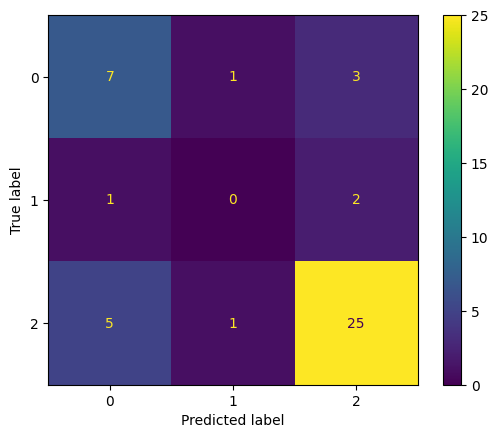

In [413]:
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
plot.plot()
plt.show()

In [414]:
score = logreg2.score(X_test, y_test)
score

0.7111111111111111

In [24]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [25]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_trial.value)  # Show the best value.

[I 2022-12-22 08:58:15,195] A new study created in memory with name: no-name-67146a68-297c-462e-95c1-5f1839b525e3
[I 2022-12-22 08:58:15,671] Trial 0 finished with value: 0.7333333333333333 and parameters: {'C': 1.2211873712739172, 'c_weight': None}. Best is trial 0 with value: 0.7333333333333333.
[I 2022-12-22 08:58:15,900] Trial 1 finished with value: 0.7333333333333333 and parameters: {'C': 0.00015441967711788047, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.7333333333333333.
[I 2022-12-22 08:58:16,356] Trial 2 finished with value: 0.7333333333333333 and parameters: {'C': 0.00128520543915033, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.7333333333333333.
[I 2022-12-22 08:58:16,808] Trial 3 finished with value: 0.7555555555555555 and parameters: {'C': 0.02283873061470798, 'c_weight': None}. Best is trial 3 with value: 0.7555555555555555.
[I 2022-12-22 08:58:17,191] Trial 4 finished with value: 0.7111111111111111 and parameters: {'C': 0.0032322167110369077, 'c_weig

0.7777777777777778


In [26]:
study.best_params

{'C': 0.004052319622429073, 'c_weight': None}

In [27]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [28]:
detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

(0.7777777777777778,
 0.8248888888888888,
 0.7777777777777778,
 0.8877665544332211)

In [33]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [34]:
study = optuna.create_study(directions=["maximize", "maximize", "maximize", "maximize"])
study.optimize(objective, n_trials=100)

[I 2022-12-22 09:01:14,934] A new study created in memory with name: no-name-f511ae16-556c-4541-a24d-d8ca5b8b6db2
[I 2022-12-22 09:01:15,340] Trial 0 finished with values: [0.7333333333333333, 0.7766579569491103, 0.7333333333333333, 0.8254769921436588] and parameters: {'C': 0.1817396676605602, 'c_weight': 'balanced'}. 
[I 2022-12-22 09:01:15,772] Trial 1 finished with values: [0.7111111111111111, 0.7541041041041041, 0.7111111111111111, 0.8039281705948372] and parameters: {'C': 0.756685056748626, 'c_weight': None}. 
[I 2022-12-22 09:01:15,921] Trial 2 finished with values: [0.4888888888888889, 0.6567164179104478, 0.4888888888888889, 1.0] and parameters: {'C': 6.0059332588676985e-06, 'c_weight': None}. 
[I 2022-12-22 09:01:16,469] Trial 3 finished with values: [0.7777777777777778, 0.8248888888888888, 0.7777777777777778, 0.8877665544332211] and parameters: {'C': 0.00334141326704672, 'c_weight': None}. 
[I 2022-12-22 09:01:16,543] Trial 4 finished with values: [0.7333333333333333, 0.744633

In [35]:
study.best_trials

[FrozenTrial(number=2, values=[0.4888888888888889, 0.6567164179104478, 0.4888888888888889, 1.0], datetime_start=datetime.datetime(2022, 12, 22, 9, 1, 15, 772908), datetime_complete=datetime.datetime(2022, 12, 22, 9, 1, 15, 920129), params={'C': 6.0059332588676985e-06, 'c_weight': None}, distributions={'C': FloatDistribution(high=10.0, log=True, low=1e-07, step=None), 'c_weight': CategoricalDistribution(choices=('balanced', None))}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, trial_id=2, state=TrialState.COMPLETE, value=None),
 FrozenTrial(number=3, values=[0.7777777777777778, 0.8248888888888888, 0.7777777777777778, 0.8877665544332211], datetime_start=datetime.datetime(2022, 12, 22, 9, 1, 15, 922129), datetime_complete=datetime.datetime(2022, 12, 22, 9, 1, 16, 469482), params={'C': 0.00334141326704672, 'c_weight': None}, distributions={'C': FloatDistribution(high=10.0, log=True, low=1e-07, step=None), 'c_weight': CategoricalDistribution(choices=('balance

In [39]:
for trial in study.best_trials:
    if trial.values[0] > 0.6:
        print(f"Accuracy: {round(trial.values[0], 3)}, F1: {round(trial.values[1], 3)}, Recall: {round(trial.values[2], 3)}, Precision: {round(trial.values[3], 3)}, Params: {trial.params}")

Accuracy: 0.778, F1: 0.825, Recall: 0.778, Precision: 0.888, Params: {'C': 0.00334141326704672, 'c_weight': None}
Accuracy: 0.778, F1: 0.825, Recall: 0.778, Precision: 0.888, Params: {'C': 0.003521405324906963, 'c_weight': None}
Accuracy: 0.778, F1: 0.825, Recall: 0.778, Precision: 0.888, Params: {'C': 0.00334141326704672, 'c_weight': None}
Accuracy: 0.778, F1: 0.825, Recall: 0.778, Precision: 0.888, Params: {'C': 0.003479807667371505, 'c_weight': None}
Accuracy: 0.778, F1: 0.825, Recall: 0.778, Precision: 0.888, Params: {'C': 0.00334141326704672, 'c_weight': None}


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = LogisticRegression(C=0.003)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

acc = accuracy_score(pred, y_test)
recall = recall_score(pred, y_test, average="weighted")
precision = precision_score(pred, y_test, average="weighted")
f1 = f1_score(pred, y_test, average="weighted")

In [43]:
print(f"Accuracy: {round(acc, 3)}, F1: {round(f1, 3)}, Recall: {round(recall, 3)}, Precision: {round(precision, 3)}")

Accuracy: 0.778, F1: 0.825, Recall: 0.778, Precision: 0.888


In [44]:
classification_report(pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.78      0.82      0.80        17\n           1       0.00      0.00      0.00         0\n           2       0.95      0.75      0.84        28\n\n    accuracy                           0.78        45\n   macro avg       0.58      0.52      0.55        45\nweighted avg       0.89      0.78      0.82        45\n'